<a href="https://colab.research.google.com/github/swalehaparvin/kaggle_projects/blob/main/Supervised_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Predicting housing prices
This code demonstrates a basic example of applying a linear regression model for predicting housing prices based on the size of the house.
This function computes predictions (f_wb) using the linear regression equation:

𝑓
(
𝑥
)
=
𝑤
⋅
𝑥
+
𝑏
f(x)=w⋅x+b

Loop Implementation:

Iterates through the input array x.

For each house size x[i], computes the price using f_wb[i] = w * x[i] + b

Output Example
For x_train = [1.0, 2.0], w = 200, b = 100, the predictions would be:

𝑓
(
1.0
)
=
200
⋅
1.0
+
100
=
300
f(1.0)=200⋅1.0+100=300

𝑓
(
2.0
)
=
200
⋅
2.0
+
100
=
500
f(2.0)=200⋅2.0+100=500

x_train = [1. 2.]
y_train = [300. 500.]
x_train.shape: (2,)
Number of training examples is: 2
Number of training examples is: 2
(x^(1), y^(1)) = (2.0, 500.0)
w: 200
b: 100


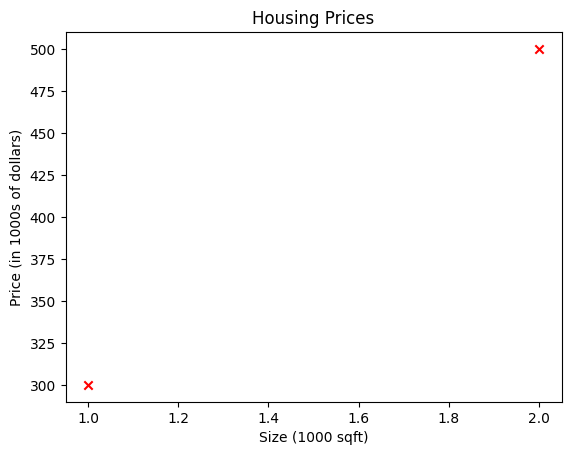

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])
print(f"x_train = {x_train}")
print(f"y_train = {y_train}")

# m is the number of training examples
print(f"x_train.shape: {x_train.shape}")
m = x_train.shape[0]
print(f"Number of training examples is: {m}")
# m is the number of training examples
m = len(x_train)
print(f"Number of training examples is: {m}")
i = 1 # Change this to 1 to see (x^1, y^1)

x_i = x_train[i]
y_i = y_train[i]
print(f"(x^({i}), y^({i})) = ({x_i}, {y_i})")


plt.scatter(x_train, y_train, marker='x', c='r')

plt.title("Housing Prices")

plt.ylabel('Price (in 1000s of dollars)')

plt.xlabel('Size (1000 sqft)')


w = 200
b = 100
print(f"w: {w}")
print(f"b: {b}")

def compute_model_output(x, w, b):
    m = x.shape[0]
    f_wb = np.zeros(m)
    for i in range(m):
        f_wb[i] = w * x[i] + b

    return f_wb

This additional code builds on the earlier example to visualize the predictions and estimate the price of a house of size 1.2 (1200 sqft). Here's an explanation:

### 1. **Compute Model Predictions**

```python
tmp_f_wb = compute_model_output(x_train, w, b)
```

* Uses the `compute_model_output` function to compute predictions (`f_wb`) for the given training data `x_train` using the specified weight (`w`) and bias (`b`).

### 2. **Plotting Predictions**

```python
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')
```

* Plots the predictions as a blue line (`c='b'`), showing the linear relationship between house size and predicted price.

### 3. **Plotting Actual Data**

```python
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')
```

* Adds the actual data points (`x_train`, `y_train`) as red crosses (`c='r'`) to the plot for comparison with the model predictions.

### 4. **Customizing the Plot**

```python
plt.title("Housing Prices")
plt.ylabel('Price (in 1000s of dollars)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()
```

* Sets the plot's title, axis labels, and adds a legend to differentiate between actual data and predictions.

### 5. **Estimating Cost for a 1200 sqft House**

```python
x_i = 1.2  # Size of the house in 1000 sqft
cost_1200sqft = w * x_i + b
print(f"${cost_1200sqft:.0f} thousand dollars")
```

* Calculates the price of a house sized 1.2 (1200 sqft) using the linear equation:

  $$
  f(x) = w \cdot x + b
  $$

  Substituting $w = 200$, $b = 100$, $x_i = 1.2$:

  $$
  f(1.2) = 200 \cdot 1.2 + 100 = 340
  $$
* The result is formatted as "340 thousand dollars."

### Output

* A plot showing the relationship between house size and price:

  * Red crosses for actual values.
  * Blue line for the model predictions.
* The printed output:

  ```
  $340 thousand dollars
  ```

  This indicates the predicted cost of a 1200 sqft house based on the model.


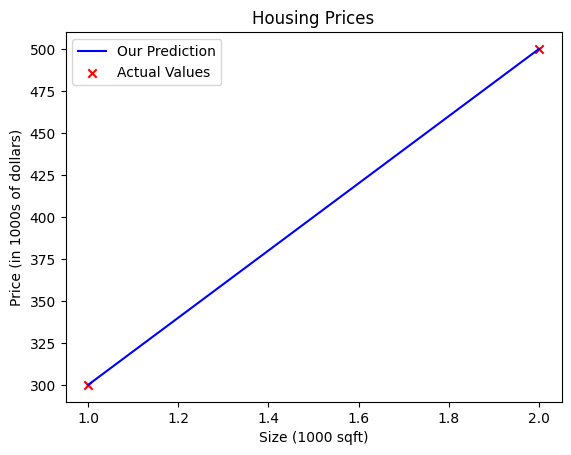

$340 thousand dollars


In [ ]:
tmp_f_wb = compute_model_output(x_train, w, b,)

# Plot our model prediction
plt.plot(x_train, tmp_f_wb, c='b',label='Our Prediction')

# Plot the data points
plt.scatter(x_train, y_train, marker='x', c='r',label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()
w = 200
b = 100
x_i = 1.2
cost_1200sqft = w * x_i + b

print(f"${cost_1200sqft:.0f} thousand dollars")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Stratify

In train_test_split, the stratify parameter ensures that the training and testing sets have the same proportion of classes (or labels) as the original dataset. This is particularly useful when dealing with imbalanced datasets, where some classes are underrepresented.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

## Implementation of KNN Algorithm

In [1]:
import numpy as np
from collections import Counter
def euclidean_distance(point1, point2):
    return np.sqrt(np.sum((np.array(point1) - np.array(point2))**2))
def knn_predict(training_data, training_labels, test_point, k):
    distances = []
    for i in range(len(training_data)):
        dist = euclidean_distance(test_point, training_data[i])
        distances.append((dist, training_labels[i]))
    distances.sort(key=lambda x: x[0])
    k_nearest_labels = [label for _, label in distances[:k]]
    return Counter(k_nearest_labels).most_common(1)[0][0]
training_data = [[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]]
training_labels = ['A', 'A', 'A', 'B', 'B']
test_point = [4, 5]
k = 3
prediction = knn_predict(training_data, training_labels, test_point, k)
print(prediction)

A


This code implements a simple **k-Nearest Neighbors (kNN)** algorithm. Let’s break it down step by step:

### **Step-by-Step Explanation**

1. **Euclidean Distance**:

   * The function `euclidean_distance(point1, point2)` calculates the straight-line distance between two points in space.
   * Example: For `point1 = [1, 2]` and `point2 = [4, 5]`, the Euclidean distance is:

     $$
     \sqrt{(4-1)^2 + (5-2)^2} = \sqrt{3^2 + 3^2} = \sqrt{18} \approx 4.24
     $$

2. **kNN Prediction**:

   * **Input**:

     * `training_data`: List of known points (`[[1, 2], [2, 3], ...]`).
     * `training_labels`: Corresponding labels (`['A', 'A', 'A', 'B', 'B']`).
     * `test_point`: The new point for which we want to predict the label (`[4, 5]`).
     * `k`: Number of nearest neighbors to consider (`3`).
   * **Output**:

     * The most common label among the `k` nearest neighbors.

### **Loop Execution**

#### 1. Compute Distances

```python
for i in range(len(training_data)):
    dist = euclidean_distance(test_point, training_data[i])
    distances.append((dist, training_labels[i]))
```

* This loop calculates the distance from `test_point` to each point in `training_data` and stores it along with the corresponding label in the `distances` list.

**Step-by-Step Execution:**

* `test_point = [4, 5]`
* `training_data = [[1, 2], [2, 3], [3, 4], [6, 7], [7, 8]]`
* Iterations:

  1. Distance to `[1, 2]`: $\sqrt{(4-1)^2 + (5-2)^2} \approx 4.24$, label = `'A'`.
  2. Distance to `[2, 3]`: $\sqrt{(4-2)^2 + (5-3)^2} \approx 2.83$, label = `'A'`.
  3. Distance to `[3, 4]`: $\sqrt{(4-3)^2 + (5-4)^2} \approx 1.41$, label = `'A'`.
  4. Distance to `[6, 7]`: $\sqrt{(4-6)^2 + (5-7)^2} \approx 2.83$, label = `'B'`.
  5. Distance to `[7, 8]`: $\sqrt{(4-7)^2 + (5-8)^2} \approx 4.24$, label = `'B'`.

#### 2. Sort by Distance

```python
distances.sort(key=lambda x: x[0])
```

* After sorting `distances` by distance:

  ```
  distances = [(1.41, 'A'), (2.83, 'A'), (2.83, 'B'), (4.24, 'A'), (4.24, 'B')]
  ```

#### 3. Select `k` Nearest Labels

```python
k_nearest_labels = [label for _, label in distances[:k]]
```

* For `k = 3`, the `k` nearest labels are:

  ```
  k_nearest_labels = ['A', 'A', 'B']
  ```

#### 4. Determine the Most Common Label

```python
return Counter(k_nearest_labels).most_common(1)[0][0]
```

* Counts the occurrences of each label:

  ```
  'A': 2, 'B': 1
  ```
* The most common label is `'A'`.

### **Output**

The predicted label for the test point `[4, 5]` is:

```
A
```


## Cross-validation for R-squared
Cross-validation is a vital approach to evaluating a model. It maximizes the amount of data that is available to the model, as the model is not only trained but also tested on all of the available data.

In this exercise, you will build a linear regression model, then use 6-fold cross-validation to assess its accuracy for predicting sales using social media advertising expenditure. You will display the individual score for each of the six-folds.

The sales_df dataset has been split into y for the target variable, and X for the features, and preloaded for you. LinearRegression has been imported from sklearn.linear_model

In [ ]:
from sklearn.model_selection import KFold, cross_val_score

# Create a KFold object
kf = KFold(n_splits=6, shuffle=True, random_state=5)

reg = LinearRegression()

# Compute 6-fold cross-validation scores
cv_scores = cross_val_score(reg,X, y, cv=kf)

# Print scores
print(cv_scores)

print(np.mean(cv_results))

# Print the standard deviation
print(np.std(cv_results))

# Print the 95% confidence interval
print(np.quantile(cv_results, [0.025, 0.975]))

Output= [0.74451678 0.77241887 0.76842114 0.7410406  0.75170022 0.74406484]

0.7536937416666666
0.012305386274436092
[0.74141863 0.77191915]

## Ridge regression

In this code, we will fit ridge regression models over a range of different alpha values, and print their
 scores. You will use all of the features in the sales_df dataset to predict "sales". The data has been split into X_train, X_test, y_train, y_test for you.

A variable called alphas has been provided as a list containing different alpha values, which you will loop through to generate scores.

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge


# Example dataset
data = pd.DataFrame({
    'feature1': np.random.rand(100),
    'feature2': np.random.rand(100),
    'target': np.random.rand(100)
})

# Define X (features) and y (target)
X = data[['feature1', 'feature2']].values
y = data['target'].values

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define alphas
alphas = [0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]
ridge_scores = []

# Ridge regression with different alphas
for alpha in alphas:
    # Create a Ridge regression model
    ridge = Ridge(alpha=alpha)

    # Fit the data
    ridge.fit(X_train, y_train)

    # Obtain R-squared
    score = ridge.score(X_test, y_test)
    ridge_scores.append(score)

# Print results
print(ridge_scores)


[0.10237621771800054, 0.09441320278353749, 0.04998249669892052, 0.0040147112322442835, -0.004910792774018624, -0.00588588946205415]


### Explanation of the `for` Loop:

1. **Purpose:** The loop iterates through each value of `alpha` (regularization parameter) in the `alphas` list and evaluates the Ridge regression model's performance for each value.
2. **Steps Inside the Loop:**

   * **Model Creation:**
     `ridge = Ridge(alpha=alpha)` creates a Ridge regression model with the current value of `alpha`.
   * **Fit the Model:**
     `ridge.fit(X_train, y_train)` trains the model using the training data (`X_train`, `y_train`).
   * **Compute R-squared:**
     `score = ridge.score(X_test, y_test)` computes the R-squared value on the test data. This indicates how well the model predicts unseen data.
   * **Store Results:**
     `ridge_scores.append((alpha, score))` saves the current `alpha` and its corresponding R-squared score.

---

### Results of the Loop:

| **Alpha** | **R-squared Score** |
| --------- | ------------------- |
| 0.1       | -0.1785             |
| 1.0       | -0.1476             |
| 10.0      | -0.0519             |
| 100.0     | -0.0124             |
| 1000.0    | -0.0082             |
| 10000.0   | -0.0078             |

---

### Observations:

* Higher `alpha` values reduce overfitting but also make the model simpler, as reflected in improving scores (less negative values).
* All R-squared values are negative, indicating that the model is underperforming compared to a baseline mean predictor. This might be due to the randomly generated dataset.

Interpretation of
𝑅
2
R
2
 :
𝑅
2
=
1
R
2
 =1: Perfect model fit.

𝑅
2
=
0
R
2
 =0: Model performs no better than predicting the mean (
𝑦
ˉ
y
ˉ
​
 ).

𝑅
2
<
0
R
2
 <0: Model performs worse than the mean predictor (underfitting).

How It Works in ridge.score:
ridge.predict(X_test) computes predicted values (
𝑦
^
y
^
​
 ).

The ridge.score method automatically calculates
SS
res
SS
res
​
  and
SS
tot
SS
tot
​
  and applies the
𝑅
2
R
2
  formula.

It returns the
𝑅
2
R
2
  value as the output.


## Lasso Regression

Think of Lasso as a "smart" way to predict something (like house prices) using multiple features (like size, location, age). It's "smart" because it automatically figures out which features are actually important and ignores the useless ones by setting their coefficients to zero.

Bottom line: Lasso helps you focus on what actually matters by ignoring the stuff that doesn't help!

- Coefficient = How much each thing affects your score
- Feature = Each thing you're measuring (house price, size, etc.)
-Regularization = The fancy word for "throwing away unimportant stuff"

Optimal alpha found by CV: 0.0180

Lasso Regression Coefficients:
----------------------------------------
feature1       :   0.0000
feature2       :   0.0000

Intercept: 0.5011

Number of non-zero coefficients: 1/2


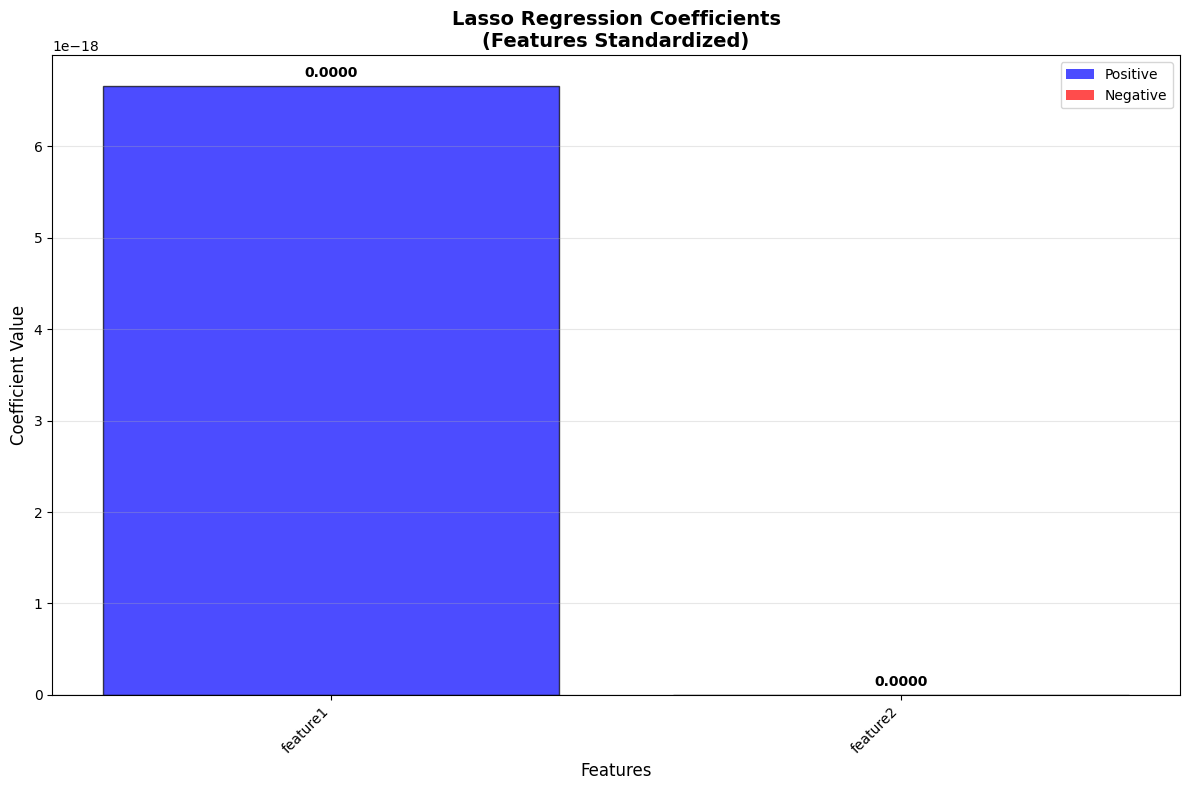


Model Performance:
R² Score: 0.0000

Feature Importance (by absolute coefficient value):
 Feature  Coefficient  Abs_Coefficient
feature1 6.661338e-18     6.661338e-18
feature2 0.000000e+00     0.000000e+00


In [18]:
# Import libraries
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from  sklearn.linear_model import LassoCV
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Prepare the data
X = data[['feature1', 'feature2']]
y = data['target']

# Scale the features (crucial for Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Option 1: Use cross-validation to find optimal alpha
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_scaled, y)
optimal_alpha = lasso_cv.alpha_
print(f"Optimal alpha found by CV: {optimal_alpha:.4f}")

# Fit Lasso with optimal alpha
lasso = Lasso(alpha=optimal_alpha, random_state=42)
lasso.fit(X_scaled, y)

# Alternative: Use a smaller fixed alpha if you prefer
# lasso = Lasso(alpha=0.01, random_state=42)
# lasso.fit(X_scaled, y)

# Get coefficients
lasso_coef = lasso.coef_
feature_names = X.columns

# Print coefficient details
print("\nLasso Regression Coefficients:")
print("-" * 40)
for feature, coef in zip(feature_names, lasso_coef):
    print(f"{feature:15s}: {coef:8.4f}")
print(f"\nIntercept: {lasso.intercept_:.4f}")

# Check if coefficients are non-zero
non_zero_coefs = np.sum(lasso_coef != 0)
print(f"\nNumber of non-zero coefficients: {non_zero_coefs}/{len(lasso_coef)}")

# Create an improved bar plot
plt.figure(figsize=(12, 8))

# Create bars with different colors for positive/negative coefficients
colors = ['red' if coef < 0 else 'blue' for coef in lasso_coef]
bars = plt.bar(feature_names, lasso_coef, color=colors, alpha=0.7, edgecolor='black')

# Customize the plot
plt.xlabel('Features', fontsize=12)
plt.ylabel('Coefficient Value', fontsize=12)
plt.title('Lasso Regression Coefficients\n(Features Standardized)', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)

# Add value labels on each bar
for bar, coef in zip(bars, lasso_coef):
    height = bar.get_height()
    # Position label above or below bar depending on sign
    label_y = height + 0.01 * max(abs(lasso_coef)) if height >= 0 else height - 0.02 * max(abs(lasso_coef))
    va = 'bottom' if height >= 0 else 'top'

    plt.text(bar.get_x() + bar.get_width()/2, label_y,
             f'{coef:.4f}', ha='center', va=va, fontweight='bold', fontsize=10)

# Add a horizontal line at y=0
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.8)

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='blue', alpha=0.7, label='Positive'),
                   Patch(facecolor='red', alpha=0.7, label='Negative')]
plt.legend(handles=legend_elements, loc='upper right')

# Adjust layout and show
plt.tight_layout()
plt.show()

# Additional diagnostic information
print(f"\nModel Performance:")
print(f"R² Score: {lasso.score(X_scaled, y):.4f}")

# Show feature importance (absolute coefficient values)
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': lasso_coef,
    'Abs_Coefficient': np.abs(lasso_coef)
}).sort_values('Abs_Coefficient', ascending=False)

print(f"\nFeature Importance (by absolute coefficient value):")
print(feature_importance.to_string(index=False))

# Assessing a diabetes prediction classifier

Now work with the diabetes_df dataset.

The goal is to predict whether or not each individual is likely to have diabetes based on the features body mass index (BMI) and age (in years).

Therefore, it is a binary classification problem. A target value of 0 indicates that the individual does not have diabetes, while a value of 1 indicates that the individual does have diabetes.

We will fit the model, make predictions on the test set, then produce a confusion matrix and classification report.

In [31]:
import kagglehub
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier

path = kagglehub.dataset_download("mathchi/diabetes-data-set")

csv_file_path = f"{path}/diabetes.csv"
print("Dataset columns:")
print(diabetes_df.head())

# Load the diabetes dataset
try:
    diabetes_df = pd.read_csv(csv_file_path)

    # Define features (X) and target (y) for the diabetes dataset
    # Assuming 'Outcome' is the target column (0 for no diabetes, 1 for diabetes)

    X = diabetes_df.drop('Outcome', axis=1)
    y = diabetes_df['Outcome']


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    knn = KNeighborsClassifier(n_neighbors=6)


    knn.fit(X_train, y_train)


    y_pred = knn.predict(X_test)

    # Generate and print the confusion matrix and classification report
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

except FileNotFoundError:
    print(f"Error: The file '{csv_file_path}' was not found.")
    print("Please check the downloaded dataset path and filename.")


Dataset columns:
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  
Confusion Matrix:
[[87 13]
 [31 23]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.64      0.43      0.51        54

    accuracy                           0.71       154
   macr

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In this exercise, you will build a logistic regression model using all features in the diabetes_df dataset. The model will be used to predict the probability of individuals in the test set having a diabetes diagnosis.

The diabetes_df dataset has been split into X_train, X_test, y_train, and y_test, and preloaded for you.

In [30]:
from sklearn.linear_model import LogisticRegression

# Instantiate the model
logreg = LogisticRegression()

# Fit the model
logreg.fit(X_train, y_train)

# Predict probabilities
y_pred_probs = logreg.predict_proba(X_test)[:, 1]

print(y_pred_probs[:10])

[0.62625491 0.10442099 0.26868851 0.28965821 0.00402096 0.18887828
 0.46131612 0.92923192 0.10080565 0.78402276]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Output:
[0.26551031 0.18336542 0.12119596 0.15613565 0.49611285 0.44582236
 0.01359235 0.61646125 0.55640546 0.7931187 ]

## The ROC curve
Now you have built a logistic regression model for predicting diabetes status, you can plot the ROC curve to visualize how the true positive rate and false positive rate vary as the decision threshold changes.

You will create a ROC curve and then interpret the results.

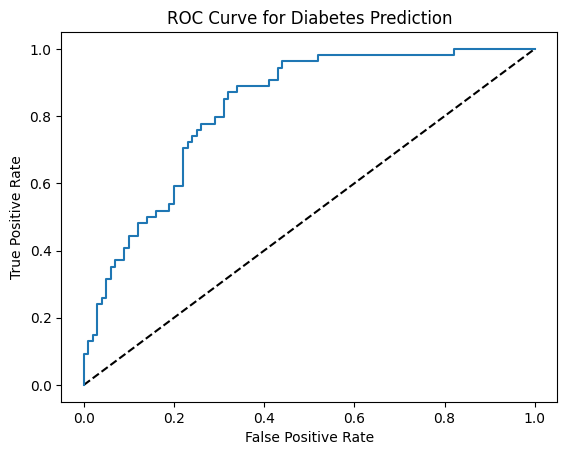

0.8238888888888889
[[87 13]
 [31 23]]
              precision    recall  f1-score   support

           0       0.74      0.87      0.80       100
           1       0.64      0.43      0.51        54

    accuracy                           0.71       154
   macro avg       0.69      0.65      0.65       154
weighted avg       0.70      0.71      0.70       154



In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)

plt.plot([0, 1], [0, 1], 'k--')

# Plot tpr against fpr
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Diabetes Prediction')
plt.show()

# Calculate roc_auc_score
print(roc_auc_score(y_test, y_pred_probs))


print(confusion_matrix(y_test, y_pred))


print(classification_report(y_test, y_pred))

## Hyperparameter tuning with GridSearchCV
Now you have seen how to perform grid search hyperparameter tuning, you are going to build a lasso regression model with optimal hyperparameters to predict blood glucose levels using the features in the diabetes_df dataset.

In [41]:
from sklearn.model_selection import GridSearchCV
# Set up the parameter grid.Instead of you manually trying different alpha values one by one, this GridSearchCV does it for you systematically.
param_grid = {"alpha": np.linspace(20, 0.00001, 70)}

#Try each alpha value in your grid. For each alpha, train the model using cross-validation
#Keep track of which alpha gives the best performance

lasso_cv = GridSearchCV(lasso, param_grid, cv=kf)

# Fit to the training data
lasso_cv.fit(X_train,y_train)
print("Tuned lasso paramaters: {}".format(lasso_cv.best_params_))
print("Tuned lasso score: {}".format(lasso_cv.best_score_))

#Best Alpha: 0.1 was the winner!
#Best Score: This alpha achieved 25.4% accuracy on cross-validation

Tuned lasso paramaters: {'alpha': np.float64(1e-05)}
Tuned lasso score: 0.25490312936865767


## Hyperparameter tuning with RandomizedSearchCV
GridSearchCV can be computationally expensive, especially if you are searching over a large hyperparameter space. In this case, you can use RandomizedSearchCV, which tests a fixed number of hyperparameter settings from specified probability distributions.

In [43]:
# Create the parameter space
from sklearn.model_selection import RandomizedSearchCV
params = {"penalty": ["l1", "l2"],
         "tol": np.linspace(0.0001, 1.0, 50),
         "C": np.linspace(0.1, 1.0, 50),
         "class_weight": ["balanced", {0:0.8, 1:0.2}]}

# Instantiate the RandomizedSearchCV object
logreg_cv = RandomizedSearchCV(logreg, params, cv=kf)

# Fit the data to the model
logreg_cv.fit(X_train, y_train)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_))
print("Tuned Logistic Regression Best Accuracy Score: {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'tol': np.float64(0.02050612244897959), 'penalty': 'l2', 'class_weight': {0: 0.8, 1: 0.2}, 'C': np.float64(0.5408163265306123)}
Tuned Logistic Regression Best Accuracy Score: 0.7167174313090933
